# DATA SCIENCE INTERN @ CODES_ON_BYTES

### AUTHOR : PARVEJ ALAM M. ANSARI

## TASK 2 : Clean the dataset replace missing values, remove outliers etc.

In [2]:
# Import required libraries:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.simplefilter('ignore')

In [3]:
# Load the dataset
df = pd.read_csv('dataset - netflix1.csv')

In [4]:
# Display first five rows:
df.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


In [5]:
# Display last five rows:
df.tail()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
8785,s8797,TV Show,Yunus Emre,Not Given,Turkey,1/17/2017,2016,TV-PG,2 Seasons,"International TV Shows, TV Dramas"
8786,s8798,TV Show,Zak Storm,Not Given,United States,9/13/2018,2016,TV-Y7,3 Seasons,Kids' TV
8787,s8801,TV Show,Zindagi Gulzar Hai,Not Given,Pakistan,12/15/2016,2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ..."
8788,s8784,TV Show,Yoko,Not Given,Pakistan,6/23/2018,2016,TV-Y,1 Season,Kids' TV
8789,s8786,TV Show,YOM,Not Given,Pakistan,6/7/2018,2016,TV-Y7,1 Season,Kids' TV


In [6]:
# Checking samples randomly:
df.sample(10)

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
8627,s7781,Movie,Power Rangers Super Samurai: Stuck on Christmas,Not Given,United States,1/1/2016,2012,TV-Y7,24 min,"Children & Family Movies, Sci-Fi & Fantasy"
1130,s1156,Movie,Marked,Nadine Ibrahim,Nigeria,3/28/2021,2021,TV-PG,21 min,"Documentaries, International Movies"
7085,s1995,TV Show,Sing On!,Not Given,United States,9/16/2020,2020,TV-PG,1 Season,Reality TV
3274,s4506,Movie,"Ron White: If You Quit Listening, I'll Shut Up",Tom Forrest,United States,10/16/2018,2018,TV-MA,63 min,Stand-Up Comedy
8262,s5754,TV Show,Vampire Knight,Not Given,Japan,10/15/2016,2008,TV-14,2 Seasons,"Anime Series, International TV Shows, Romantic..."
4195,s5887,Movie,Manson Family Vacation,J. Davis,United States,10/27/2015,2015,TV-MA,85 min,"Comedies, Dramas, Independent Movies"
1719,s2040,Movie,Toll Booth,Tolga Karaçelik,Turkey,9/7/2020,2010,TV-MA,98 min,"Dramas, Independent Movies, International Movies"
6777,s921,TV Show,Selena: The Series,Not Given,Mexico,5/4/2021,2020,TV-PG,2 Seasons,TV Dramas
3541,s4891,Movie,John Mulaney: Kid Gorgeous at Radio City,Alex Timbers,United States,5/1/2018,2018,TV-MA,65 min,Stand-Up Comedy
3612,s4997,Movie,Bullet Head,"Paul Solet, Rick Benattar",Bulgaria,3/7/2018,2017,R,94 min,"International Movies, Thrillers"


In [7]:
# Checking shape of dataset:
df.shape

(8790, 10)

In [8]:
# Checking column names:
df.columns

Index(['show_id', 'type', 'title', 'director', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in'],
      dtype='object')

In [9]:
# Display basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   country       8790 non-null   object
 5   date_added    8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
 9   listed_in     8790 non-null   object
dtypes: int64(1), object(9)
memory usage: 686.8+ KB


In [10]:
# Display summary statistics of numerical columns:
df.describe()

,release_year
count,8790.000000
mean,2014.183163
std,8.825466
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [11]:
# Display summary statistics of non-numerical columns:

categorical_columns = df.select_dtypes(include=['category', 'object']).columns

# Use describe for categorical columns
categorical_summary = df[categorical_columns].describe(include='all')

# Display the summary
categorical_summary

,show_id,type,title,director,country,date_added,rating,duration,listed_in
count,8790,8790,8790,8790,8790,8790,8790,8790,8790
unique,8790,2,8787,4528,86,1713,14,220,513
top,s1,Movie,9-Feb,Not Given,United States,1/1/2020,TV-MA,1 Season,"Dramas, International Movies"
freq,1,6126,2,2588,3240,110,3205,1791,362


In [12]:
# To check , if there is any duplicated value 
df.duplicated().sum()

0

In [13]:
# Check for missing values
df.isnull().sum()

show_id         0
type            0
title           0
director        0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64

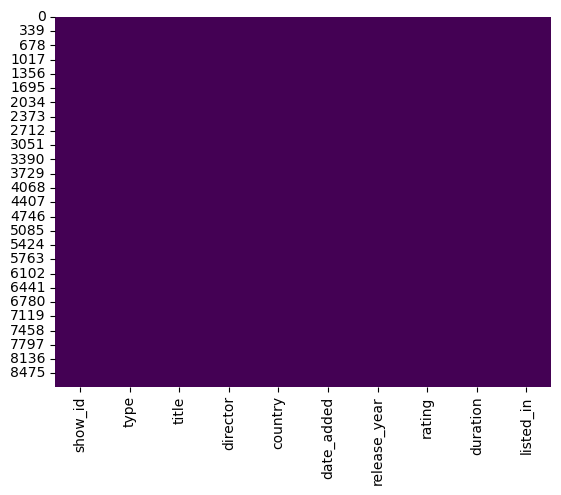

In [14]:
# Visualize missing values using a heatmap
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.show()

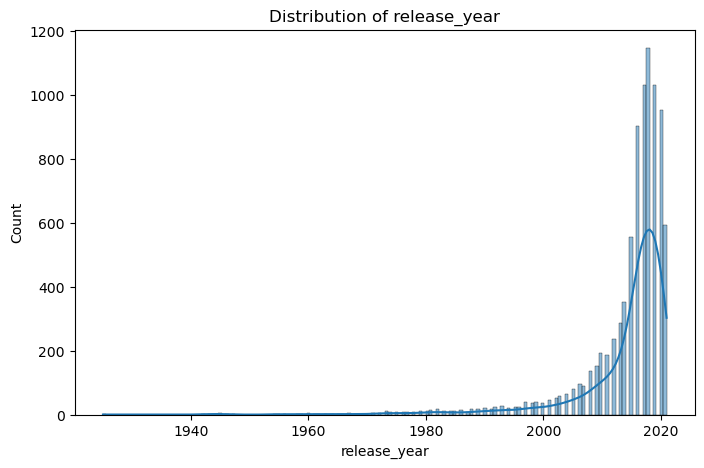

In [15]:
# Visualize the distribution of numerical features before  removing outliers

numerical_columns = df.select_dtypes(include=[np.number]).columns

# Visualize the distribution of numerical features
for col in numerical_columns:
    plt.figure(figsize=(8, 5))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

In [16]:
# Remove outliers using z-score
from scipy.stats import zscore

z_scores = zscore(df.select_dtypes(include=[np.number]))
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
df = df[filtered_entries]

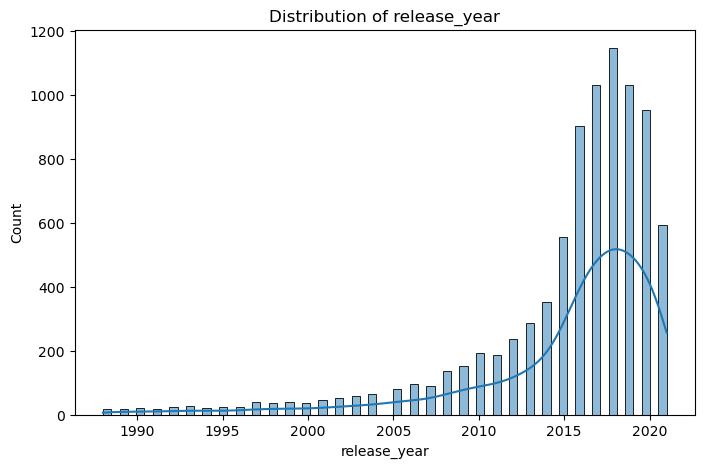

In [17]:
# Visualize the distribution of numerical features after removing outliers
num_cols = df.select_dtypes(include=[np.number]).columns
for col in num_cols:
    plt.figure(figsize=(8, 5))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

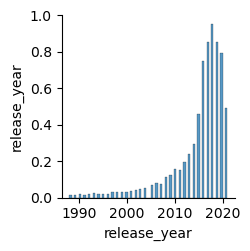

In [18]:
# Visualize relationships between features using pairplots
sns.pairplot(df)
plt.show()

In [19]:
# Save the cleaned dataset
df.to_csv('netflix_cleaned_dataset.csv', index=False)

<p style="background-color:#F1C40F;color:black;font-size:22px;text-align:center;border-radius:10px 10px;font-weight:bold;border:2px solid #F1C40F;">Thank you😄!!!!!!</p>